In [1]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
'''
@File    :   data_preprocessing.py
@Time    :   2020/10/27 14:45:46
@Author  :   Rao Guangxiang 
@Version :   1.0
@Contact :   408903228@qq.com
@License :   my-self
@Desc    :   None
'''

# here put the import lib

import pandas as pd
import sys
from os.path import expanduser
from os import sep
# 加载自定义模块
project = "{}{}{}".format(expanduser("~"),sep,"linux_tools_for_chinese")
sys.path.append(project)
# 加载各模块位置
from file_tools import ml_model_dir, search_moduel_dir, data_preprocessing_dir, python_functional_script_dir, bash_functional_script_dir, data_structure_dir, question_data_dir, math_module_dir,info_table,onehot_matrix_static_list,word_frequency_of_each_articles_static_table,eigenvector_static_table,feature_static_dictionary,feature_static_vector,static_cache_dir
# 加载机器学习模块
sys.path.append(ml_model_dir)
from tfidf import TF,IDF,TFIDF
import simulate_anneal
from feature_dictionary_editor import feature_dictionary_editor
from onehot_encoding import character_encoding
# 加载数据预处理模块
sys.path.append(data_preprocessing_dir)
import extract,determine_character_type,text_preprocessing
# 加载数据结构模块
sys.path.append(data_structure_dir)
from data_structure import check_ndarray,deeping_flatten,data_structure_normalization
# 加载数学模块
sys.path.append(math_module_dir)
from statistics_module import frequency,sort_by_dictionary_value,probability_optimization,probaitily
sys.path.append(static_cache_dir)


In [2]:
## 数据预处理模块
def change_list_from_DataFrame_func(table_path,column_names=[]):
    '''读取DF表格并选择dict结构'''
    table = pd.read_csv(table_path)
    columns_list = [column for column in table.columns if 'Unnamed' in column]
    newtable = table.drop(columns_list,axis=1)
    newtable.to_csv(table_path)
    dicts = newtable.to_dict()
    return {column_name : [dicts[column_name][row] for row in dicts[column_name]] for column_name in column_names}
    
'''加载信息表的内容'''
info = change_list_from_DataFrame_func(info_table,["文字说明","命令"])
instructions_text = info['文字说明']
command_encoder = info['命令']
'''分割说明书的停用词为列表'''
split_words = text_preprocessing.split_words_from_chinese_func(instructions_text)
split_words[:10]

Building prefix dict from /Users/zhangjing/opt/anaconda3/lib/python3.7/site-packages/jieba/dict.txt ...
Loading model from cache /var/folders/2b/3ndz1t7n7kj621h92mmnc2x80000gn/T/jieba.cache
Loading model cost 1.009213924407959 seconds.
Prefix dict has been built succesfully.


['扫描', '本', '机', '所在', '网段', '上', '有', '哪些', '主机', '是']

In [3]:
len(instructions_text)
onehot_matrix_static_list,word_frequency_of_each_articles_static_table,eigenvector_static_table,feature_static_dictionary,feature_static_vector

('/Users/zhangjing/linux_tools_for_chinese/8_static_cache/onehot_matrix_list',
 '/Users/zhangjing/linux_tools_for_chinese/8_static_cache/word_frequency_of_each_article.csv',
 '/Users/zhangjing/linux_tools_for_chinese/8_static_cache/eigenvector_table.csv',
 '/Users/zhangjing/linux_tools_for_chinese/8_static_cache/static',
 '/Users/zhangjing/linux_tools_for_chinese/8_static_cache/feature_vector')

# 数据特征预处理

In [4]:
encoding_text_list = character_encoding(instructions_text)
onehot_matrix_list = encoding_text_list['单文章onehot矩阵']
word_frequency_of_each_article = encoding_text_list['每篇文章出现的单词词频']
eigenvector_table = encoding_text_list['每篇文章出现的单词特征概率']
feature_dictionary = encoding_text_list['概率特征字典']
feature_vector = encoding_text_list['概率特征向量']
number_of_words = encoding_text_list['总字数']
words_list = encoding_text_list["单词列表"]

In [5]:
import json


In [6]:
onehot_matrix_list

{0: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 1: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 2: array([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 3: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.,

In [90]:
word_frequency_of_each_article

,主机,ip,目标,查询,的,，,扫描,系统,输入,上传,...,检查,激活,留下,盘,设备,识别,运行,酒店,隐藏,集
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
type(eigenvector_table)

pandas.core.frame.DataFrame

In [214]:
import json
import logging
import os
import pandas as pd


def my_loging_function(obj):
    logging.basicConfig(level = logging.INFO,format = '%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    logger = logging.getLogger(__name__)
    logger.info(obj)
    logger.debug(obj)
    logger.warning(obj)
    logger.info(obj)


def path_checking_function(args,return_key=False):
    '''
    路径检查函数
    '''
    result = dict()
    deeping_level = 0 
    level1 = display_dir_or_file(args)
    if level1:
        return {deeping_level:{level1:args}}
    else:
        temp_check_path = os.sep
        for dirname in args.split(os.sep):
            deeping_level += 1
            temp_check_path = os.path.join(temp_check_path,dirname)
            level2 = display_dir_or_file(temp_check_path)
            if return_key:
                if level2==False:
                    return False
            result.update({deeping_level:{level2:temp_check_path}})

        return result

def convert_dictionary_to_dataframe_function():
    """
    '将字典转换为数据帧'
    """
    pass


def convert_the_dictionary_to_josn_function(data)->dict:
    """
    '将字典转换为josn'
    """
    if isinstance(data,dict):
        return json.dumps(feature_dictionary,sort_keys=False, indent=4, separators=(',', ': '),ensure_ascii=False)
    else:
        return False

def save_as_csv_format_function(table,table_path=False):
    """
    '保存为csv格式'
    """
    check_path = path_checking_function(table_path)
    if len(check_path) < 2:
        return table.to_csv(table_path)
    dir_checking = list(check_path)[-2]
    file_checking = list(check_path)[-1]
    if ((dir_checking=='isdir') or (file_checking == "isfile")) and (file_checking.split('.')[-1]=='csv'):
        if isinstance(table,pd.core.frame.DataFrame):
            return table.to_csv(table_path)
    pass    


def save_as_josn_function(data,file_path)->dict:
    """
    '保存为josn格式'
    """
    if path_checking_function(file_path,return_key=True)==False:
        return "can't find this file or dirs"
    elif os.path.isdir(file_path):
        return False
    josn_data = convert_the_dictionary_to_josn_function(feature_dictionary)
    file = file_path
    init_data = convert_the_dictionary_to_josn_function(data)
    with open(file_path,'w') as file:
        file.writelines(init_data)
    file.close()
            

def save_as_text_format_function():
    """
    '保存为text格式'
    """
    pass

def display_dir_or_file(args):
    '''
    显示是文件还是文件夹
    '''
    if os.path.isfile(args):
        return 'isfile'
    elif os.path.isdir(args):
        return "isdir"
    else:
        return False



def convert_dictionary_to_dataframe_function(data
                                             ,save_path=static_cache_dir
                                             ,tablename_keyword='convert_dictionary_to_dataframe_function'
                                             ,column_names=False):
    """
    '将字典转换为数据帧'
    """
    if isinstance(data,dict):
        checking_level1 = display_dir_or_file(save_path)
        if checking_level1 == "isdir":
            for No,dataMatrix in data.items():
                table_path=  "{}{}{}{}{}".format(save_path,tablename_keyword,"_",No,".csv")
                my_loging_function(table_path)
                init_table = pd.DataFrame(dataMatrix,columns=column_names)
                init_table.to_csv(table_path)
            
            
def create_folder_function(dirpath):
    """
    '创建文件夹函数'
    """
    if display_dir_or_file(dirpath) == "isdir":
        return dirpath
    else:
        init_dir_path = os.sep
        for dir_path in dirpath.split(os.sep):
            init_dir_path+=dir_path
            if os.path.isdir(init_dir_path):
                pass


# 将词频字典专为josn文件保存
#save_as_josn_function(feature_dictionary,file_path="test.josn")
# 路径检查函数
#path_checking_function(os.getcwd()+'/test/')
# 将每篇文章的词频保存为DataFrame后转为csv文件保存
#save_as_csv_format_function(word_frequency_of_each_article,table_path=os.path.abspath(os.path.join(os.getcwd()+os.sep,'test.csv')))
#将文章的onehot字典专为矩阵
#convert_dictionary_to_dataframe_function(onehot_matrix_list,column_names=words_list)


def search_files_function(target,dirpath=os.getcwd()):
    '''
    列出文件夹下所有路径
    '''
    configfile = os.path.expanduser("~/linux_tools_for_chinese/8_static_cache/pathconfig.py")
    file = open(configfile,'w+')
    file_type_dict = {'csv':[],'other':[],'log':[],'sh':[],
                      'txt':[],'pyc':[],'ini':[],'josn':[],
                      'DS_Store':[],'py':[],'json':[],'ipynb':[],
                      }
    check_path_config = os.path.expanduser("~/linux_tools_for_chinese/8_static_cache/pathconfig.")
    for dir_,folder,files in os.walk(dirpath):
        for file in files:
            temp = os.path.join(dir_,file)
            split_file_name = temp.split(".")
            file_type = split_file_name[-1]
            clearning_file_name = split_file_name[0]
            if file_type in file_type_dict:
                file_type_dict[file_type].append(temp)
            else:
                file_type_dict["other"].append(temp)
            var_name = os.path.split(temp)[-1].split(".")[0]
            if len(var_name):
                code_characters = var_name + " = "+ clearning_file_name
                print(code_characters)
            file.write(code_characters.decode('utf8'))
    file.close()
                
                
    return file_type_dict

search_files_function("8_static_cache",os.path.expanduser("~/linux_tools_for_chinese/"))

python_functionals = /Users/zhangjing/linux_tools_for_chinese/python_functionals


AttributeError: 'str' object has no attribute 'write'

In [ ]:
# 将 Python 对象编码成 JSON 字符串
to_josn = json.dumps(feature_dictionary,sort_keys=False, indent=4, separators=(',', ': '),ensure_ascii=False)
# 将已编码的 JSON 字符串解码为 Python 对象
text = json.loads(to_josn)

In [ ]:
feature_vector

In [ ]:
number_of_words

In [ ]:
words_list

In [57]:
static_cache_dir

'/Users/zhangjing/linux_tools_for_chinese/8_static_cache/'

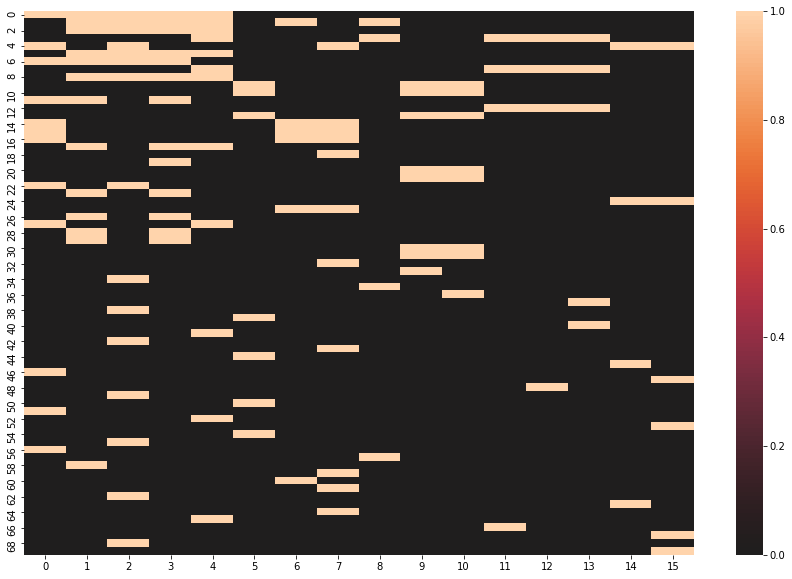

In [102]:
import numpy as np
import seaborn as sns

def my_colorar(matrix):
    plt.figure(figsize=(15,10))
    sns.heatmap(matrix, vmin=0, vmax=1, center=0)
    return plt.show()
my_colorar(np.array([matrix for No,matrix in onehot_matrix_list.items()]).sum(axis=1).T)

array([[1., 0., 0., ..., 0., 0., 0.],
       [2., 1., 1., ..., 0., 0., 0.],
       [2., 1., 2., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])